#Task 1

In [ ]:
# impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
#Loading Data
train_data=pd.read_csv('/content/train_t1.csv')

In [ ]:
train_data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [ ]:
x_train=train_data.drop('target',axis=1)
y_train=train_data['target']

In [ ]:
num_cluster=5
kmeans=KMeans(n_clusters=num_cluster,random_state=42)
kmeans.fit(x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_train)

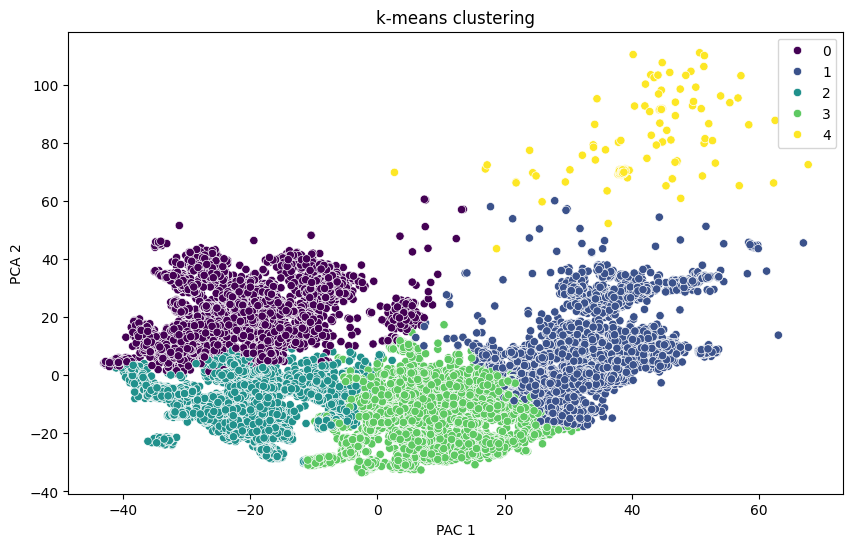

In [ ]:
#plotting cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=kmeans.labels_,palette='viridis',legend='full')
plt.title("k-means clustering")
plt.xlabel('PAC 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
#Function to identify cluster for a given data point
def identify_clust(data_point):
  cluster_id=kmeans.predict([data_point])[0]
  centroid=kmeans.cluster_centers_[cluster_id]
  cluster_distance=kmeans.inertia_
  return cluster_id,centroid,cluster_distance

In [ ]:
def main_task1(train_df):
  train_data=pd.read_csv(train_df)
  x_train=train_data.drop('target',axis=1)
  y_train=train_data['target']
  num_cluster=5
  kmeans=KMeans(n_clusters=num_cluster,random_state=42)
  kmeans.fit(x_train)

  #take the data poit fromthe user
  print("enter the values for each feature")
  data_point_values=[]
  for i in x_train.columns:
    value=float(input(f"{i}: "))
    data_point_values.append(value)

  data_point=pd.DataFrame([data_point_values]).values[0]
  cluster_id,centroid,cluster_distance=identify_clust(data_point)

  #print Result
  print("\nResults:")
  print("Data point belongs to cluster:", cluster_id)
  print("centroid",centroid)
  print("cluster distance",cluster_distance)

In [ ]:
main_task1("/content/train_t1.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


enter the values for each feature
T1: -44
T2: -45
T3: -67
T4: -86
T5: -55
T6: -23
T7: -44
T8: -89
T9: -98
T10: -64
T11: -76
T12: -34
T13: -76
T14: -99
T15: -88
T16: -77
T17: -66
T18: -55

Results:
Data point belongs to cluster: 1
centroid [-58.94384422 -60.00427136 -65.27160804 -68.81683417 -70.69886935
 -70.7008794  -76.5660804  -78.72223618 -77.21796482 -58.13580402
 -61.00175879 -64.5410804  -67.49020101 -74.46180905 -72.68630653
 -76.15263819 -76.77738693 -78.18555276]
cluster distance 29021041.24764347


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#Task 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_data=pd.read_csv("/content/train_t1.csv")
test_data=pd.read_csv("/content/test_t1.csv")

In [ ]:
x_train=train_data.drop('target',axis=1)
y_train=train_data['target']

In [ ]:
x_train_split,x_val,y_train_split,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
models={
    "logistic Reg": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

train_accuracy={}
test_predictions={}

for m,n in models.items():
  n.fit(x_train_split,y_train_split)
  train_pred=n.predict(x_train_split)
  val_pred=n.predict(x_val)

  train_accuracy[m]=accuracy_score(y_train_split,train_pred)

  test_pred=n.predict(test_data)
  test_predictions[m]=test_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
for m,n in test_predictions.items():
  print(f"Target values for {m}:",n)

Target values for logistic Reg: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']
Target values for Decision Tree: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']
Target values for Random Forest: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


In [ ]:
for m,n in train_accuracy.items():
  print(f"Train Accuracy for {m}",n)

Train Accuracy for logistic Reg 0.9680282983571987
Train Accuracy for Decision Tree 0.9996598755144382
Train Accuracy for Random Forest 0.9996598755144382


#Task 3.1

In [ ]:
raw_data=pd.read_csv("/content/raw_data.csv")

In [ ]:
raw_data.head()

,date,time,sensor,location,number,activity,position,location.1
0,1/16/2024,10:10:30 AM,0.0,A1,1,placed,inside,A1
1,1/16/2024,10:12:30 AM,1.0,A2,1,picked,inside,A2
2,1/16/2024,10:28:30 AM,1.0,A3,1,picked,Inside,A3
3,1/16/2024,10:38:20 AM,0.0,A4,1,placed,Inside,A4
4,1/16/2024,10:45:20 AM,1.0,A5,1,placed,inside,A5


In [ ]:
raw_data['datetime']=pd.to_datetime(raw_data['date']+' '+raw_data['time'])

In [ ]:
raw_data

,date,time,sensor,location,number,activity,position,location.1,datetime
0,1/16/2024,10:10:30 AM,0.0,A1,1,placed,inside,A1,2024-01-16 10:10:30
1,1/16/2024,10:12:30 AM,1.0,A2,1,picked,inside,A2,2024-01-16 10:12:30
2,1/16/2024,10:28:30 AM,1.0,A3,1,picked,Inside,A3,2024-01-16 10:28:30
3,1/16/2024,10:38:20 AM,0.0,A4,1,placed,Inside,A4,2024-01-16 10:38:20
4,1/16/2024,10:45:20 AM,1.0,A5,1,placed,inside,A5,2024-01-16 10:45:20
...,...,...,...,...,...,...,...,...,...
170,1/18/2024,12:45:05 PM,0.0,A8,2,placed,inside,A8,2024-01-18 12:45:05
171,1/18/2024,12:53:10 PM,1.0,A9,2,picked,inside,A9,2024-01-18 12:53:10
172,1/18/2024,12:59:10 PM,1.0,A10,2,placed,outside,A10,2024-01-18 12:59:10
173,1/18/2024,1:10:20 PM,1.0,A11,2,picked,Inside,A11,2024-01-18 13:10:20


In [ ]:
raw_data.sort_values(by="datetime",inplace=True)

In [ ]:
raw_data

,date,time,sensor,location,number,activity,position,location.1,datetime
24,1/16/2024,12:02:20 AM,0.0,A25,1,placed,inside,A25,2024-01-16 00:02:20
16,1/16/2024,12:02:20 AM,1.0,A17,1,placed,inside,A17,2024-01-16 00:02:20
18,1/16/2024,12:08:20 AM,1.0,A19,1,picked,inside,A19,2024-01-16 00:08:20
19,1/16/2024,12:10:20 AM,0.0,A20,1,placed,inside,A20,2024-01-16 00:10:20
26,1/16/2024,12:15:20 AM,1.0,A27,1,picked,inside,A27,2024-01-16 00:15:20
...,...,...,...,...,...,...,...,...,...
149,1/18/2024,6:57:00 PM,0.0,A30,1,picked,outside,A30,2024-01-18 18:57:00
150,1/18/2024,7:10:00 PM,NaN,A31,1,placed,Inside,A31,2024-01-18 19:10:00
151,1/18/2024,7:19:00 PM,1.0,A32,1,picked,inside,A32,2024-01-18 19:19:00
152,1/18/2024,7:23:00 PM,1.0,A33,1,placed,inside,A33,2024-01-18 19:23:00


In [ ]:
raw_data['duration']=raw_data.groupby('position')['datetime'].diff().dt.total_seconds().fillna(0)

In [ ]:
total_duration_datewise=raw_data.groupby([raw_data['datetime'].dt.date,'position'])['duration'].sum()

In [ ]:
print(total_duration_datewise)

datetime    position
2024-01-16  Inside         590.0
            inside       43020.0
2024-01-17  inside       91320.0
2024-01-18  Inside      203500.0
            inside      108540.0
            outside      21470.0
Name: duration, dtype: float64


#Task 3.2

In [ ]:
date_wise_activities=raw_data.groupby(['date','activity']).size()

In [ ]:
print(date_wise_activities)

date       activity
1/16/2024  picked      40
           placed      40
1/17/2024  picked      10
           placed       9
1/18/2024  picked      37
           placed      39
dtype: int64
